In [1]:
!python --version

Python 3.10.12


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/yolov10-20241222T171951Z-001.zip -d /content/drive/MyDrive


Archive:  /content/drive/MyDrive/yolov10-20241222T171951Z-001.zip
   creating: /content/drive/MyDrive/yolov10/yolov10/.ipynb_checkpoints/
  inflating: /content/drive/MyDrive/yolov10/yolov10/.gitignore  
  inflating: /content/drive/MyDrive/yolov10/yolov10/figures/latency.svg  
  inflating: /content/drive/MyDrive/yolov10/yolov10/logs/yolov10m.csv  
  inflating: /content/drive/MyDrive/yolov10/yolov10/.git/description  
  inflating: /content/drive/MyDrive/yolov10/yolov10/ultralytics.egg-info/SOURCES.txt  
  inflating: /content/drive/MyDrive/yolov10/yolov10/.git/HEAD  
  inflating: /content/drive/MyDrive/yolov10/yolov10/ultralytics.egg-info/top_level.txt  
  inflating: /content/drive/MyDrive/yolov10/yolov10/requirements.txt  
  inflating: /content/drive/MyDrive/yolov10/yolov10/figures/params.svg  
  inflating: /content/drive/MyDrive/yolov10/yolov10/mkdocs.yml  
  inflating: /content/drive/MyDrive/yolov10/yolov10/logs/yolov10x.csv  
  inflating: /content/drive/MyDrive/yolov10/yolov10/test_im

In [5]:
cd /content/drive/MyDrive/yolov10/yolov10

/content/drive/MyDrive/yolov10/yolov10


In [6]:
!pip install .

Processing /content/drive/MyDrive/yolov10/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731421 sha256=9cc449d2f98763128be3a9ef9b37a4c7a42898073a61222b48ad3fc4bf9c8d24
  Stored in directory: /tmp/pip-ephem-wheel-cache-6qmdqhmd/wheels/e0/5c/c5/d22bce75bef0898c2550abd1966300fc02a321253d8e962783
Successfully built ultralytics


In [9]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt"
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded /content/drive/MyDrive/yolov10/yolov10/weights/yolov10n.pt
Downloaded /content/drive/MyDrive/yolov10/yolov10/weights/yolov10s.pt
Downloaded /content/drive/MyDrive/yolov10/yolov10/weights/yolov10m.pt
Downloaded /content/drive/MyDrive/yolov10/yolov10/weights/yolov10b.pt
Downloaded /content/drive/MyDrive/yolov10/yolov10/weights/yolov10x.pt
Downloaded /content/drive/MyDrive/yolov10/yolov10/weights/yolov10l.pt


In [11]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/drive/MyDrive/yolov10/yolov10/weights/yolov10n.pt source=/content/drive/MyDrive/yolov10/yolov10/test_image/1.jpg

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

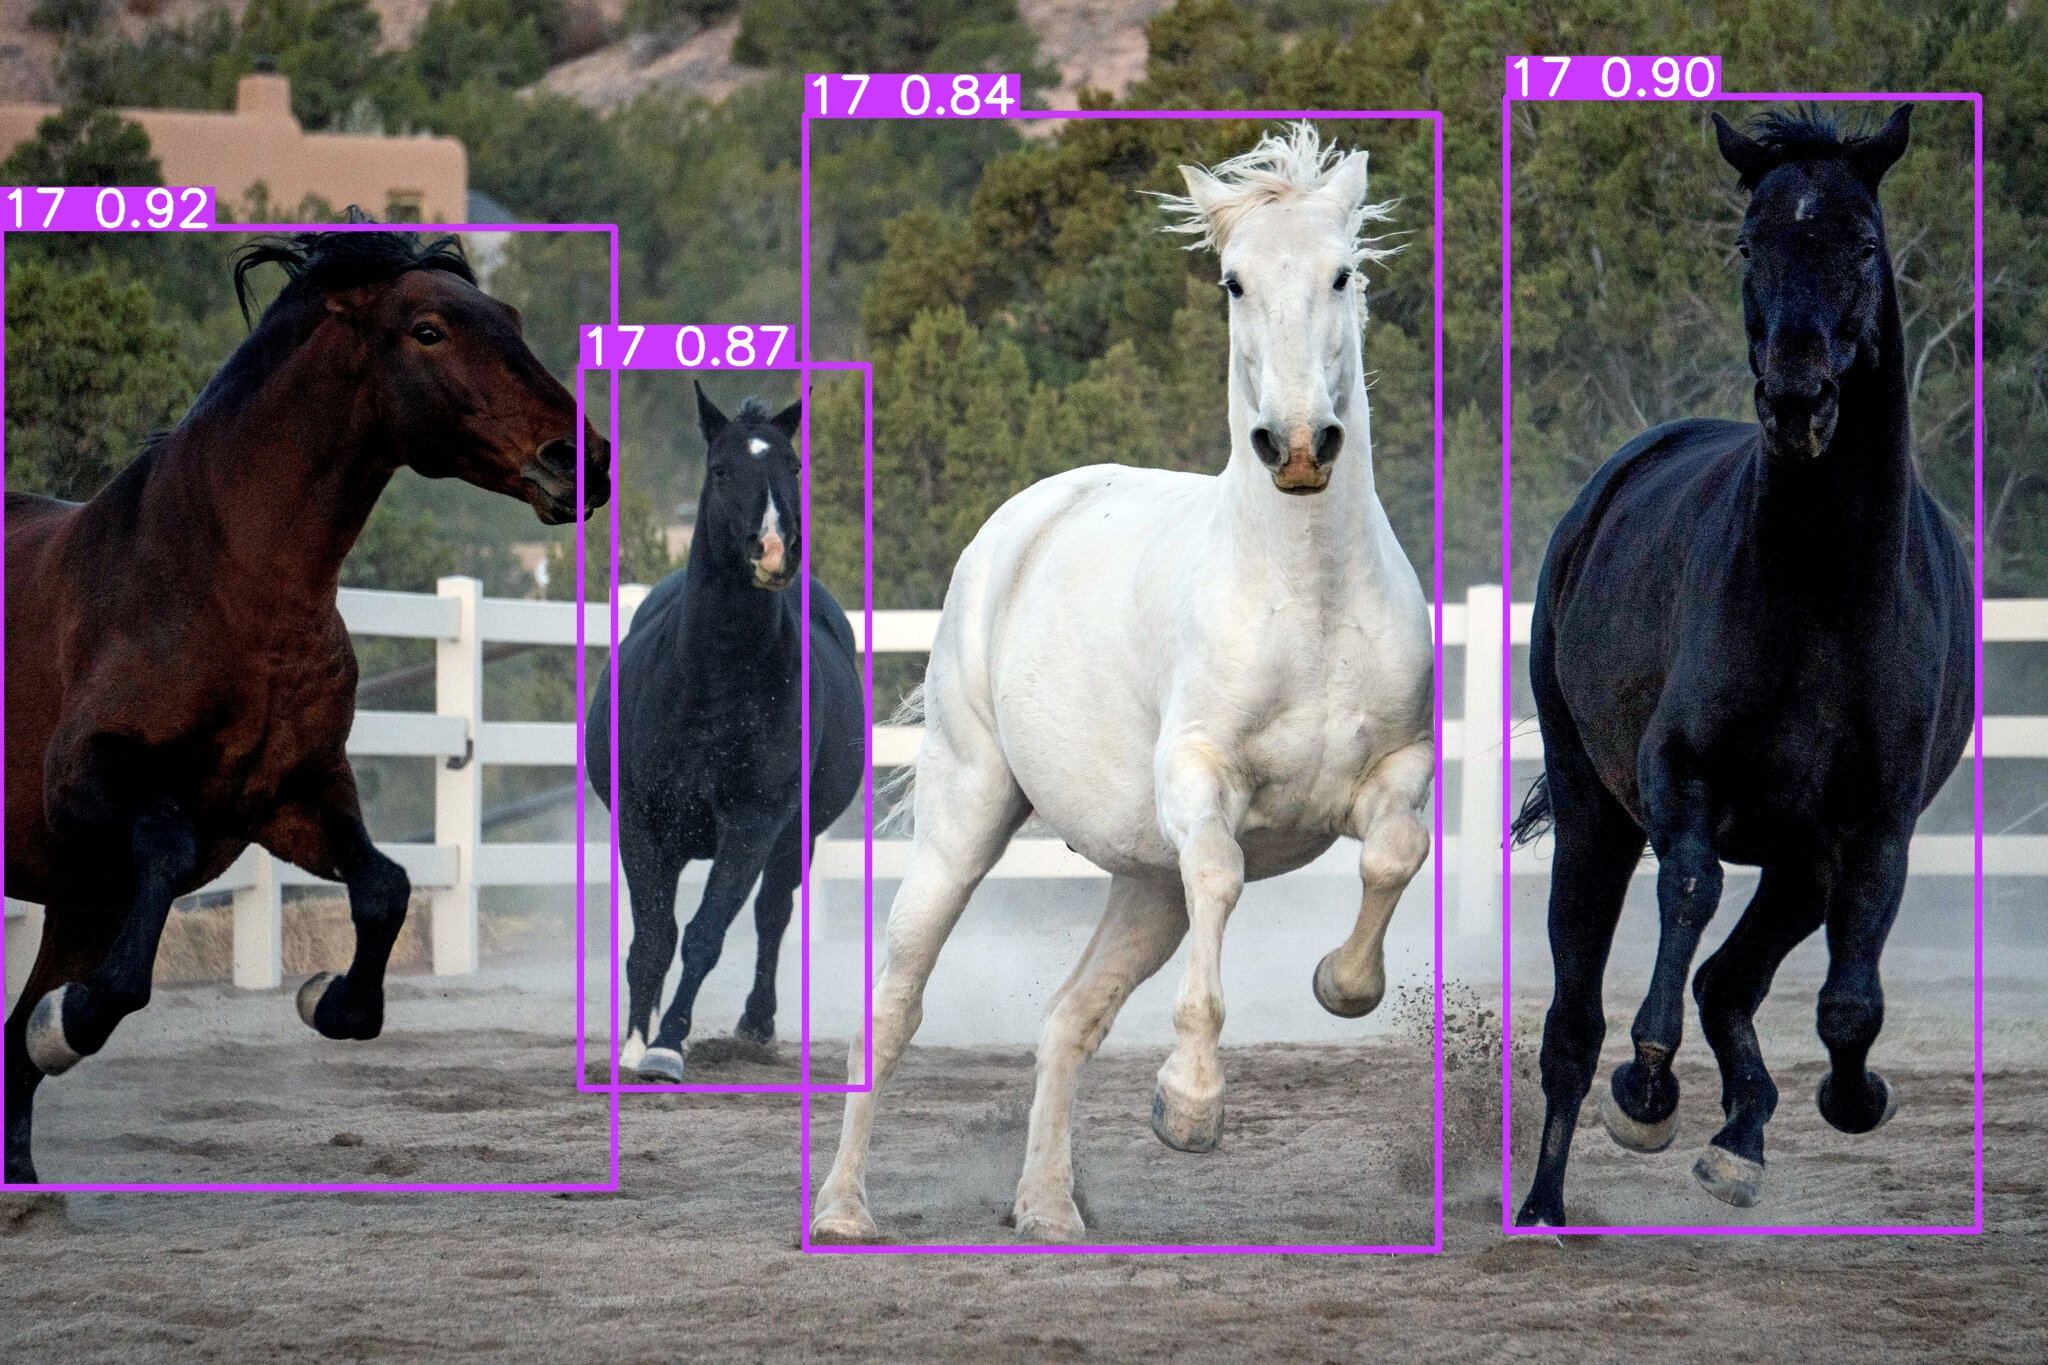

In [12]:
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/yolov10/yolov10/runs/detect/predict2/1.jpg", width=1000)

In [13]:
import zipfile

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/dataset.zip'

# Open and extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/yolov10/yolov10')


In [15]:
#!yolo task=detect mode=train epochs=200 batch=32 plots=True model=weights/yolov10n.pt data=/content/yolov10/yolov10/data.yaml
!yolo task=detect mode=train epochs=200 batch=32 plots=True model=weights/yolov10n.pt data=/content/drive/MyDrive/yolov10/yolov10/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

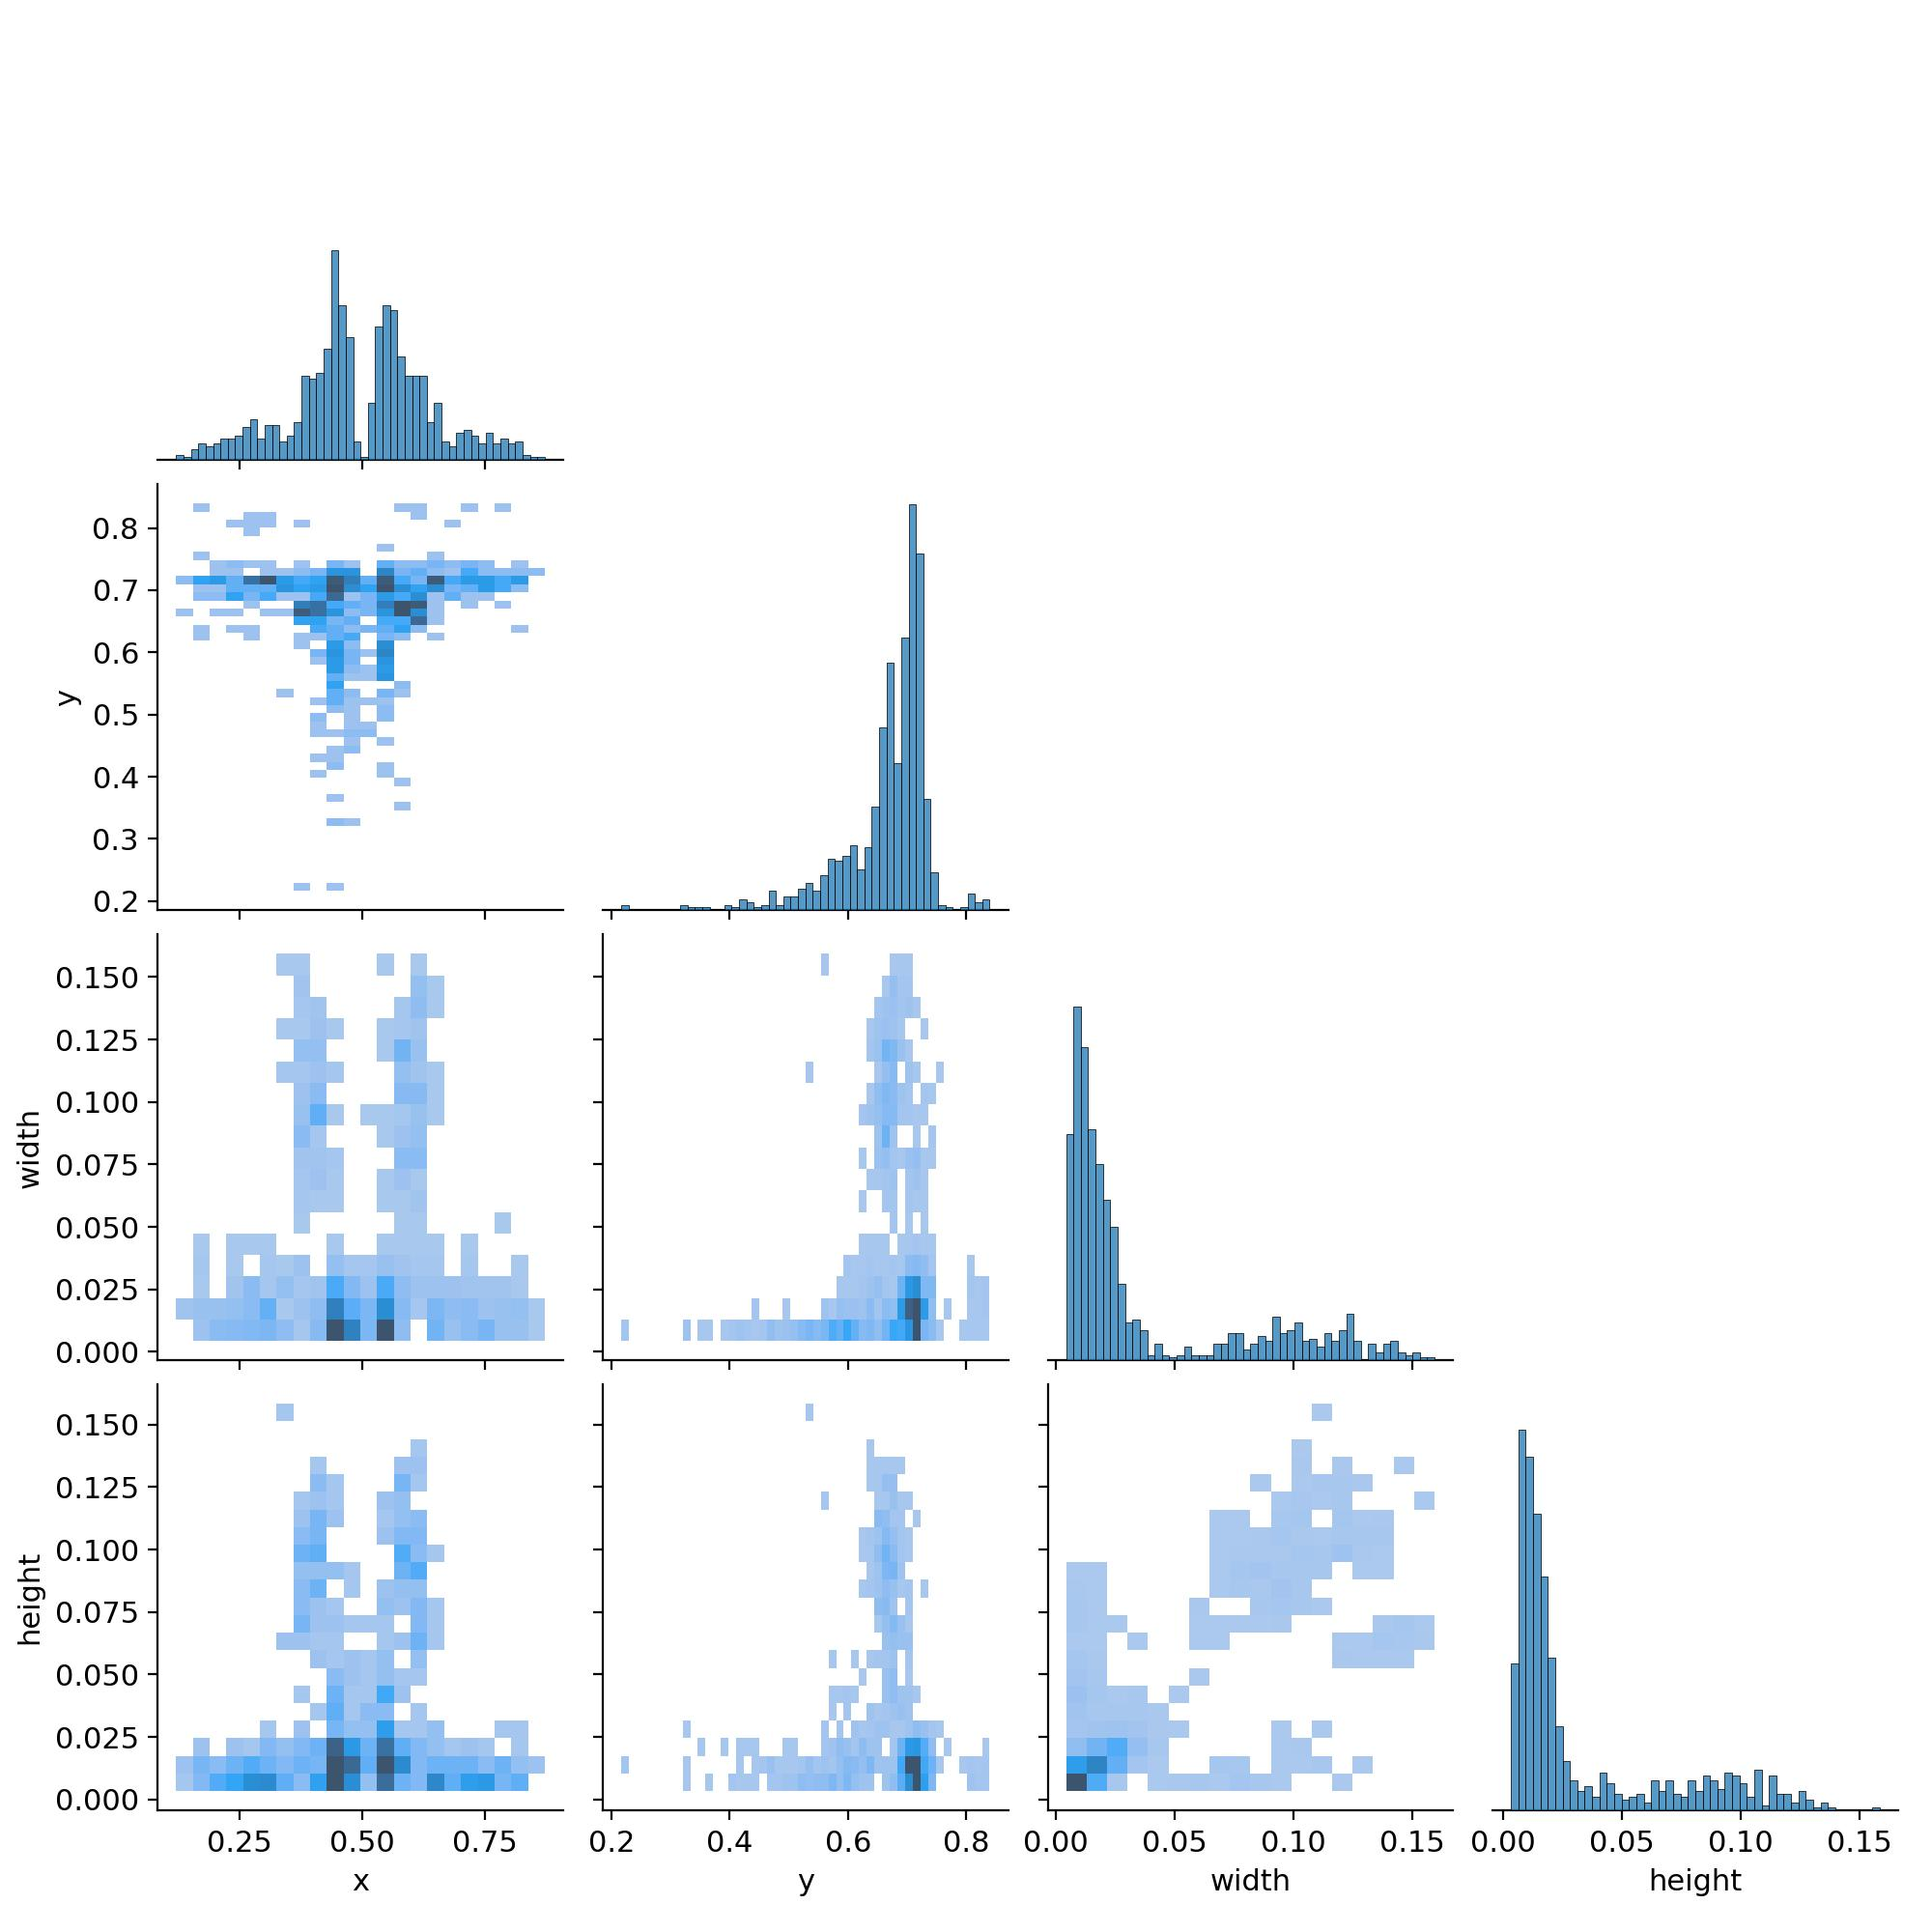

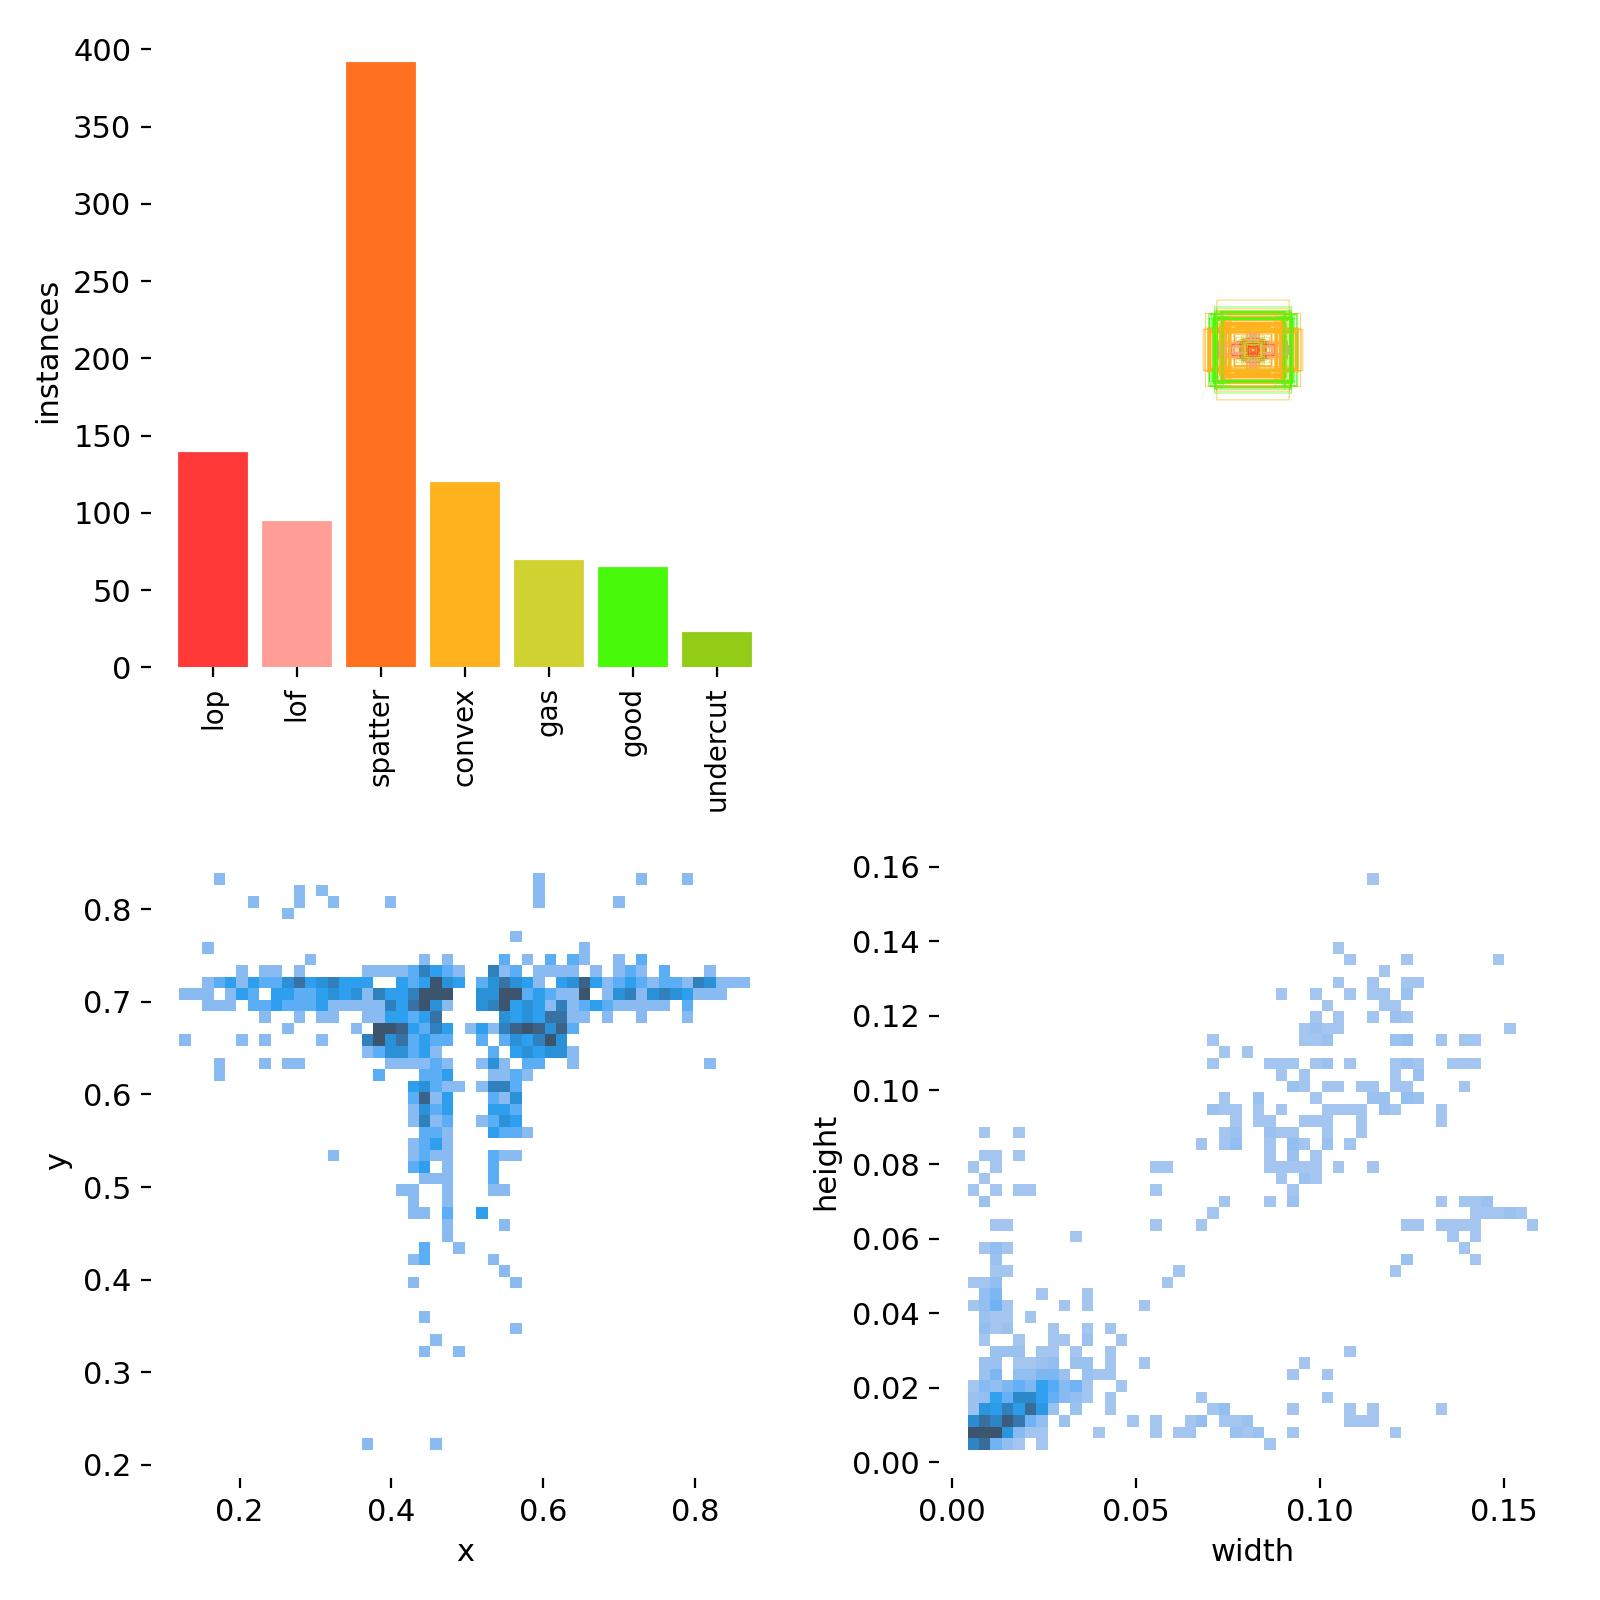

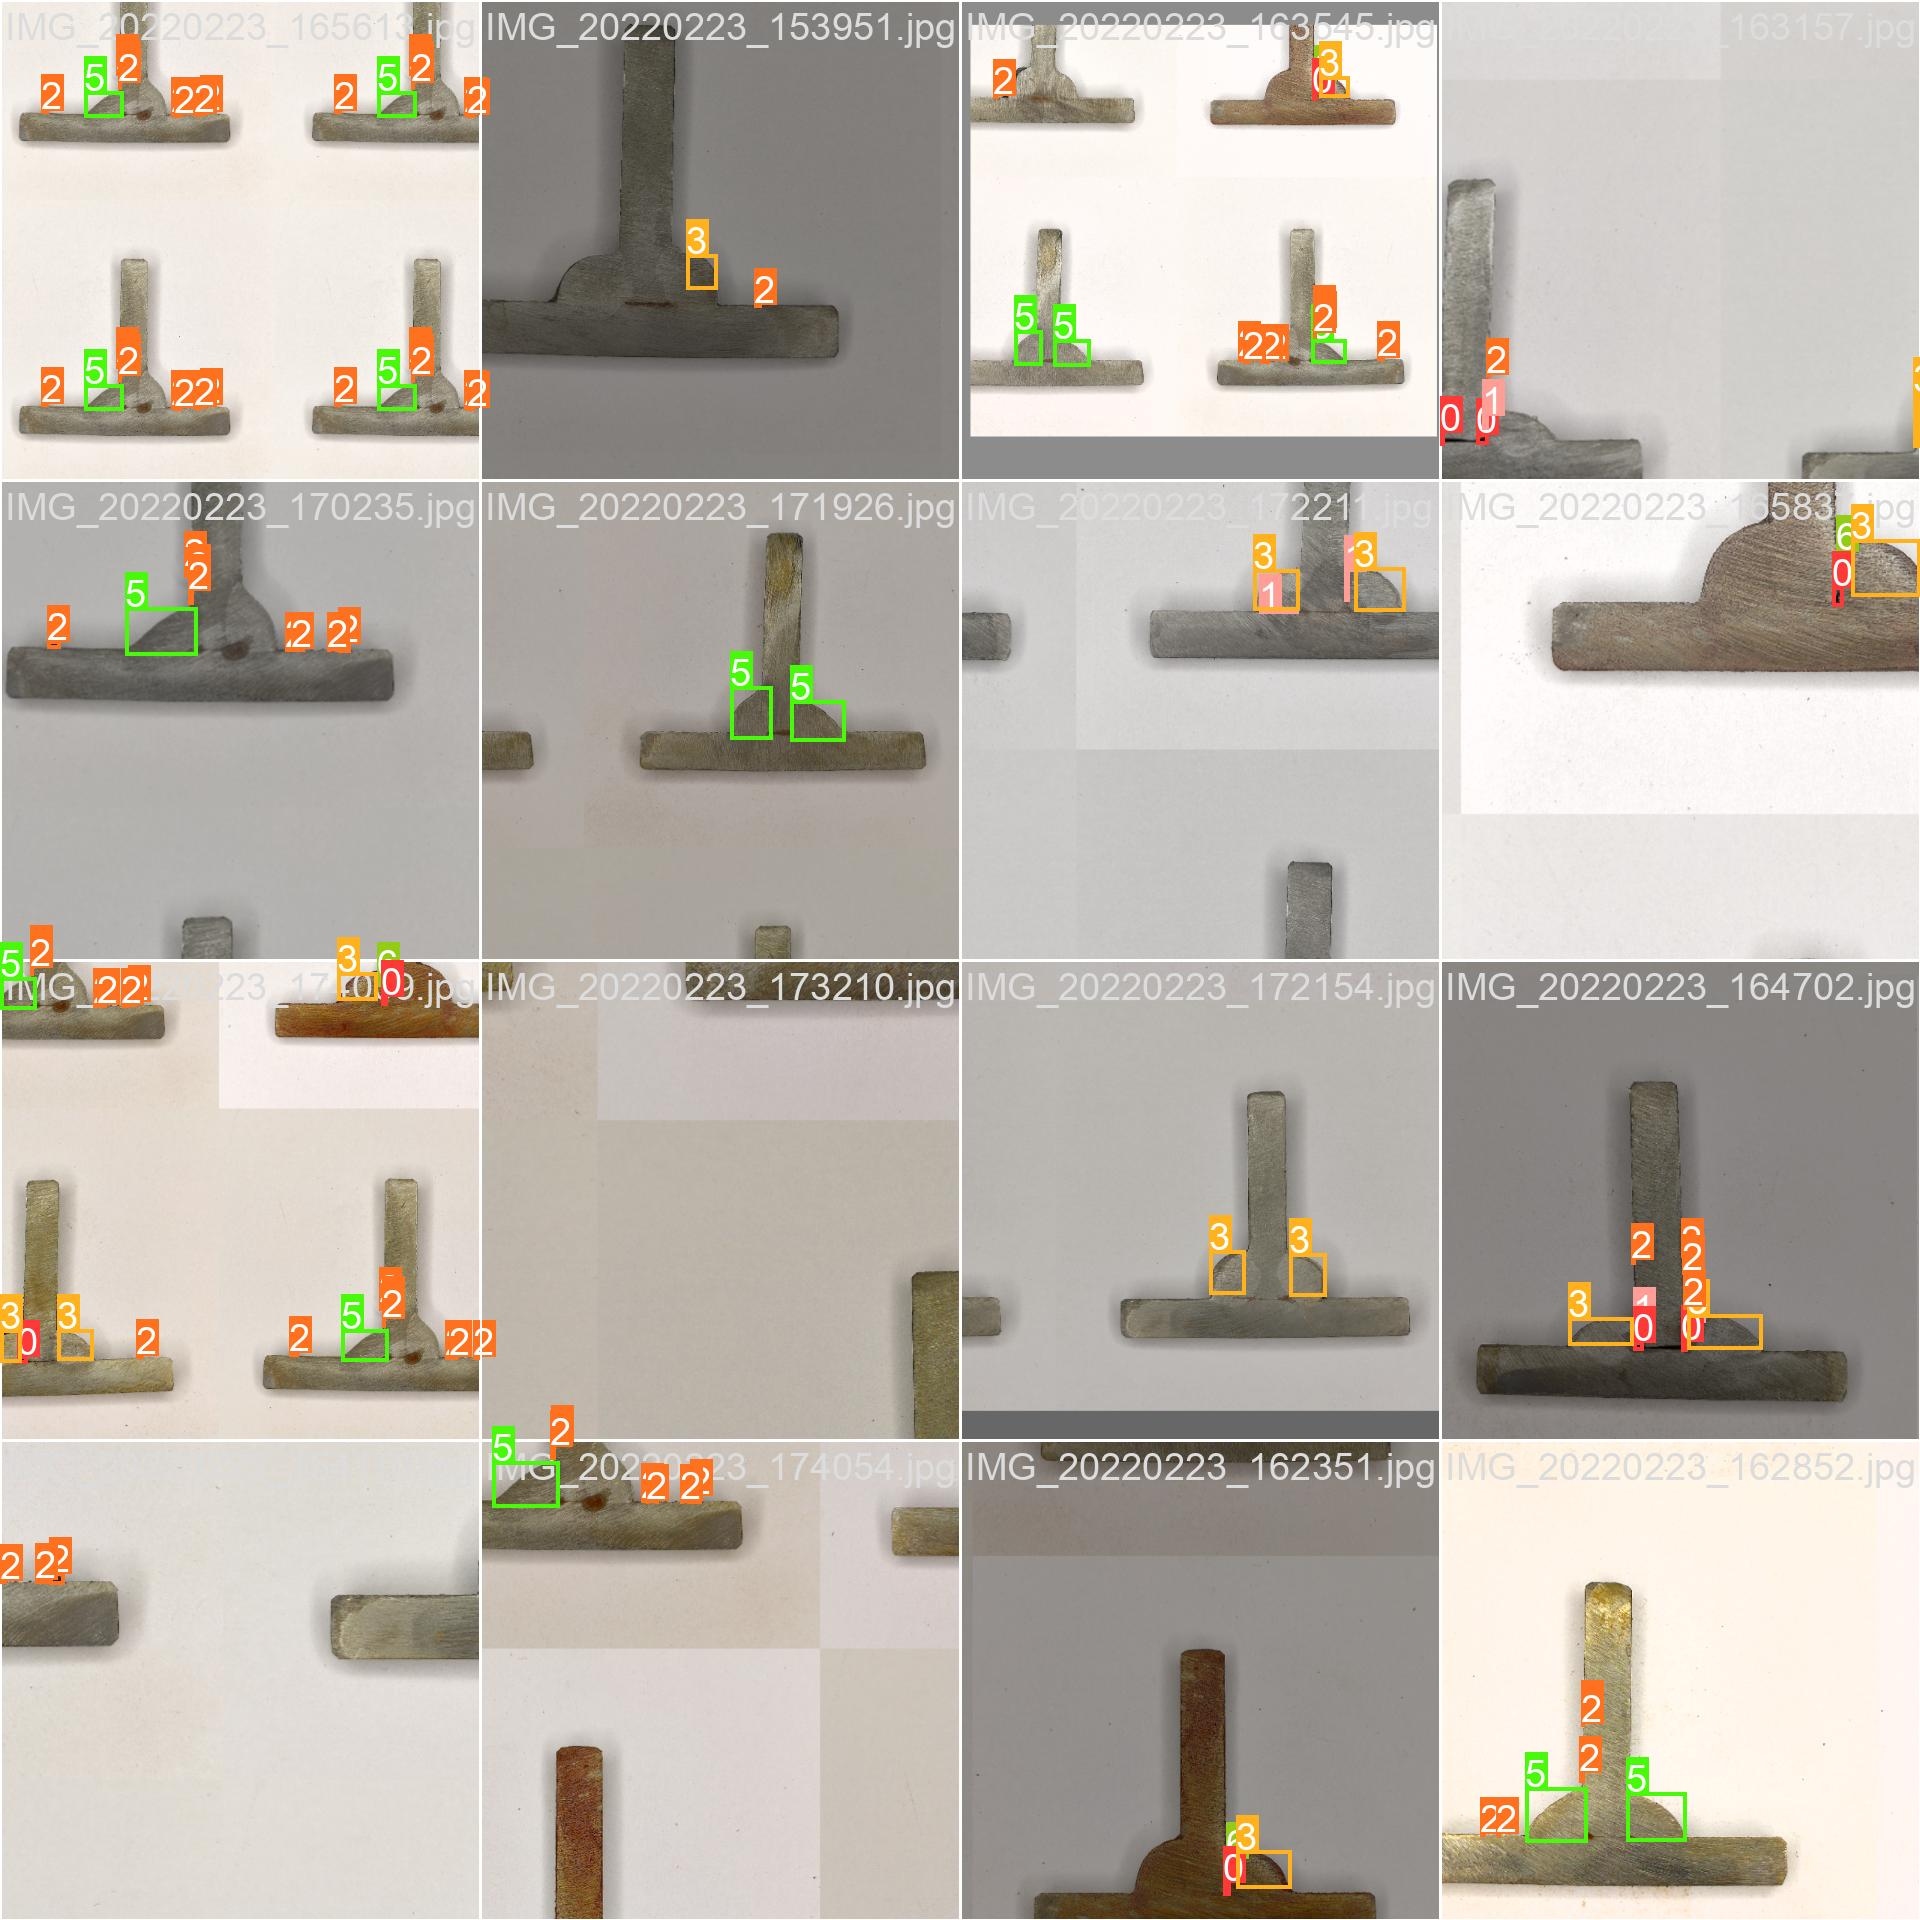

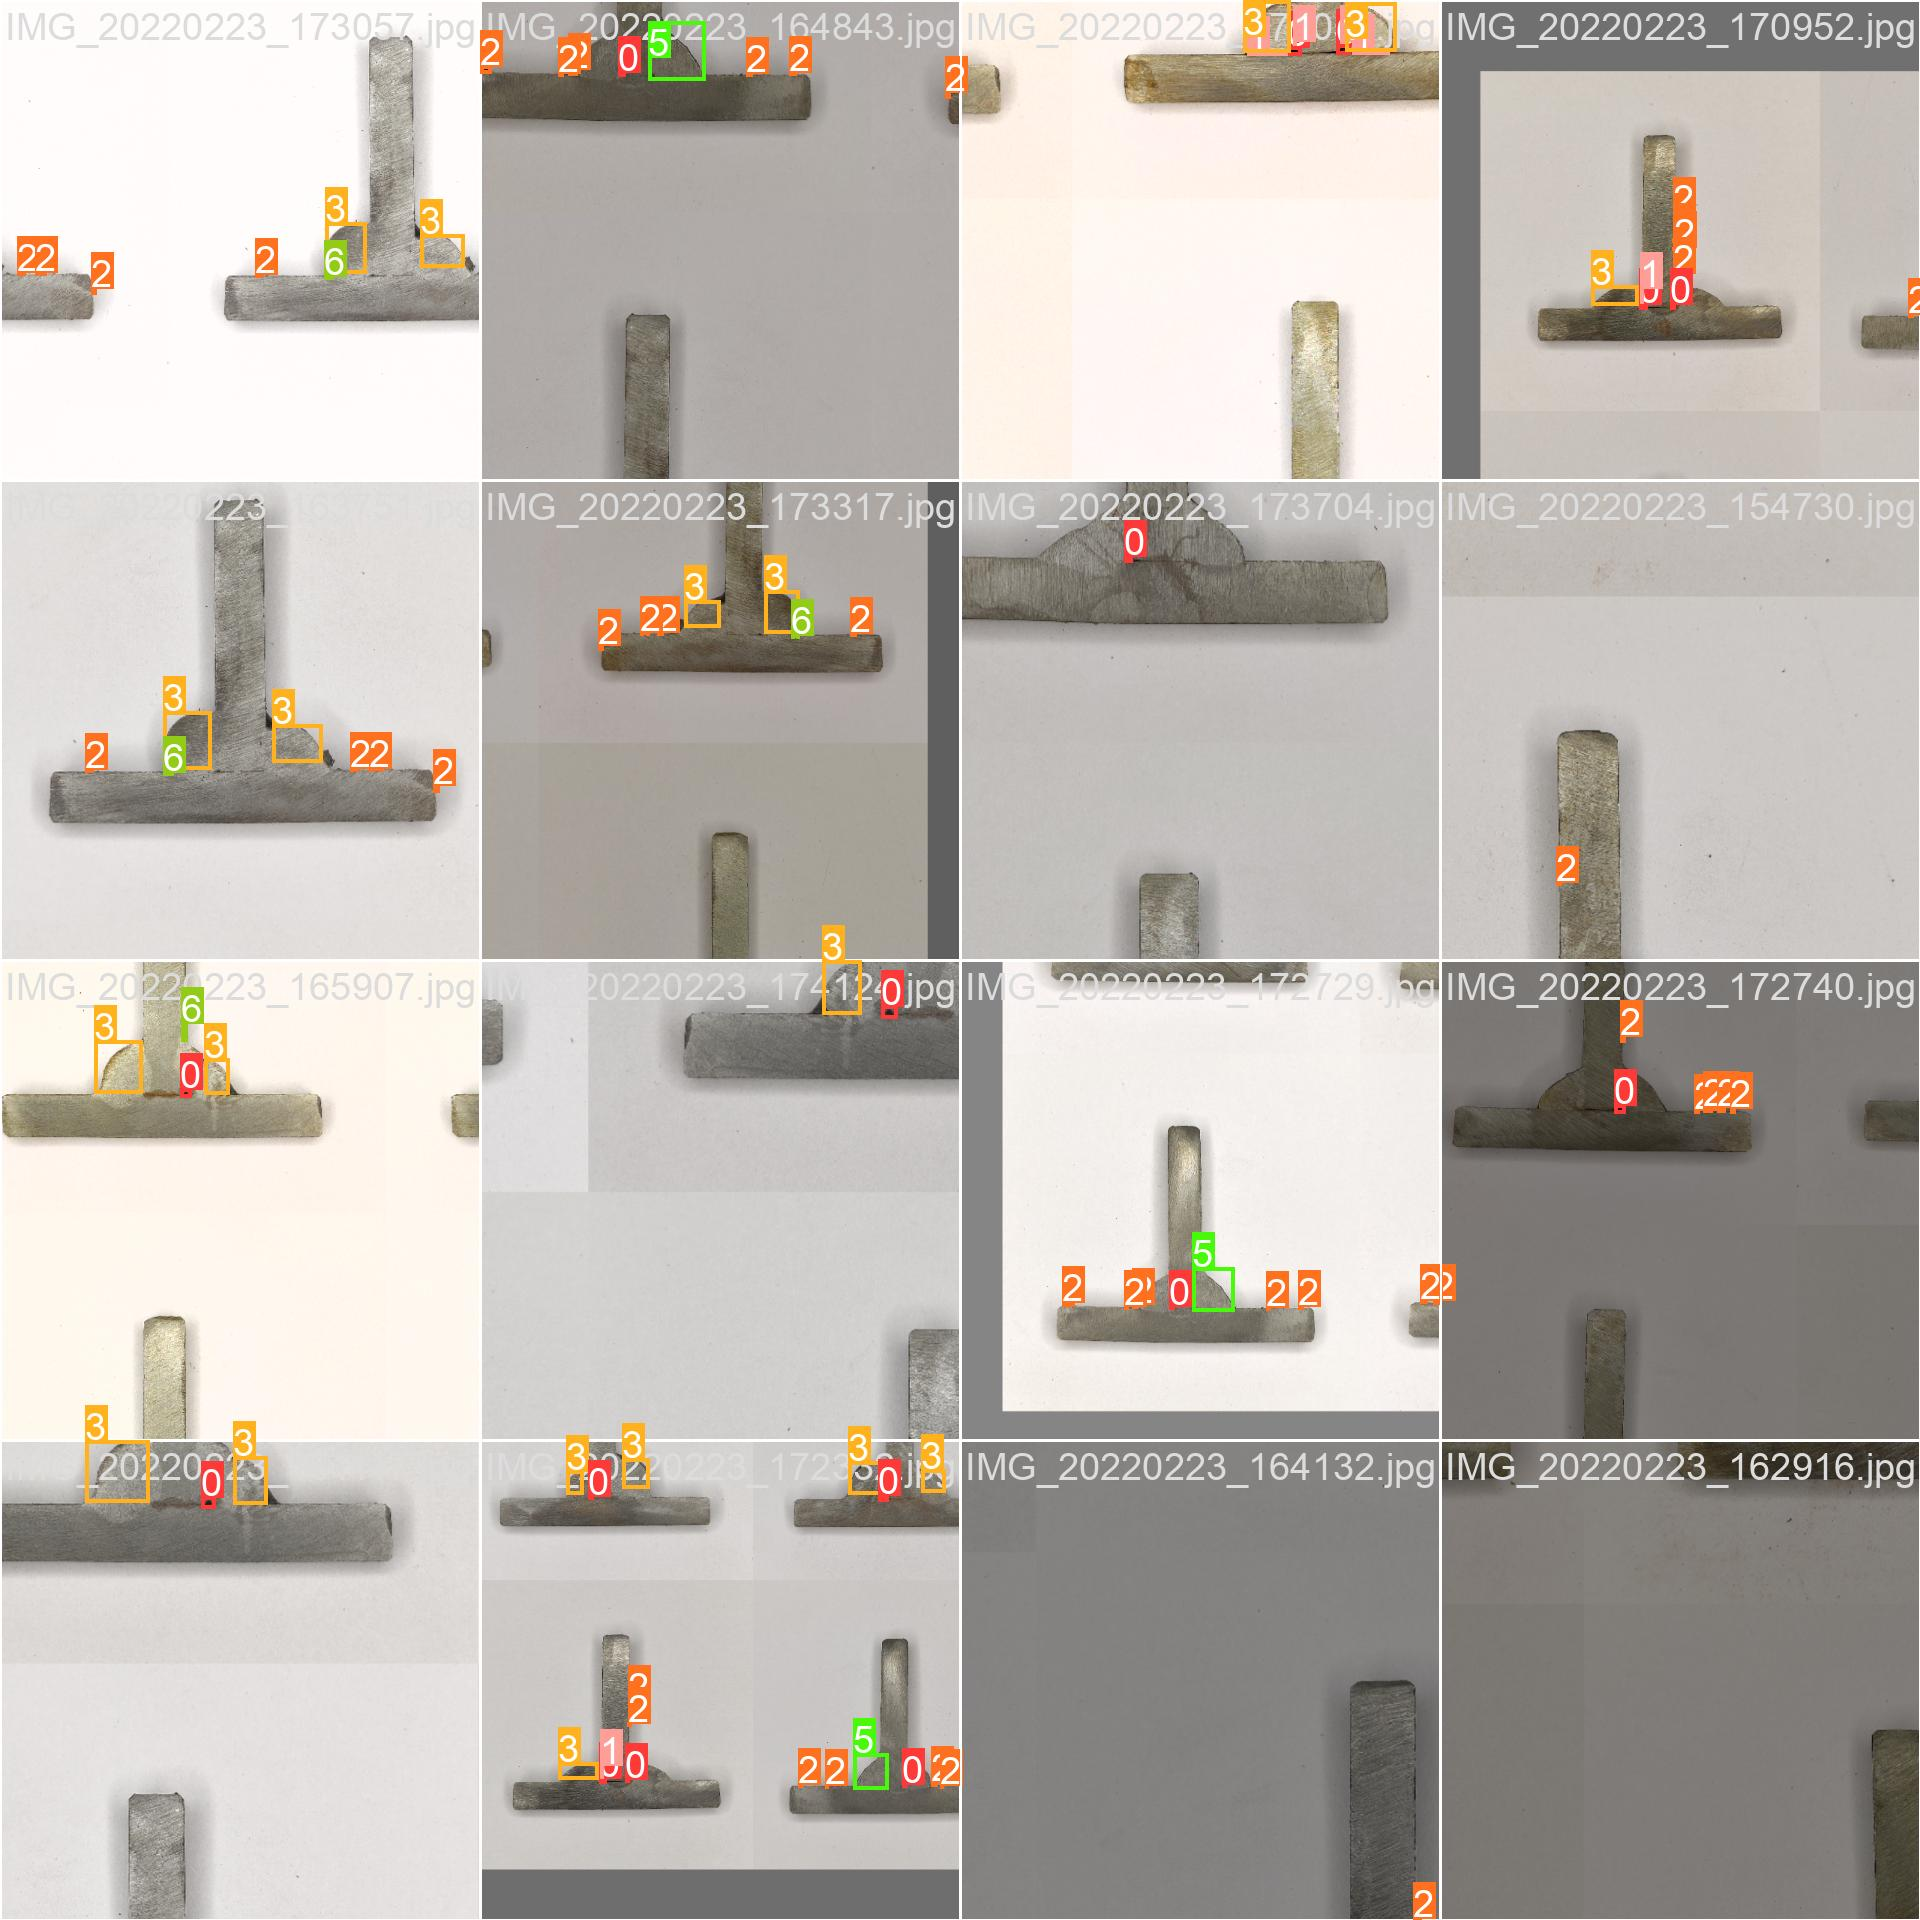

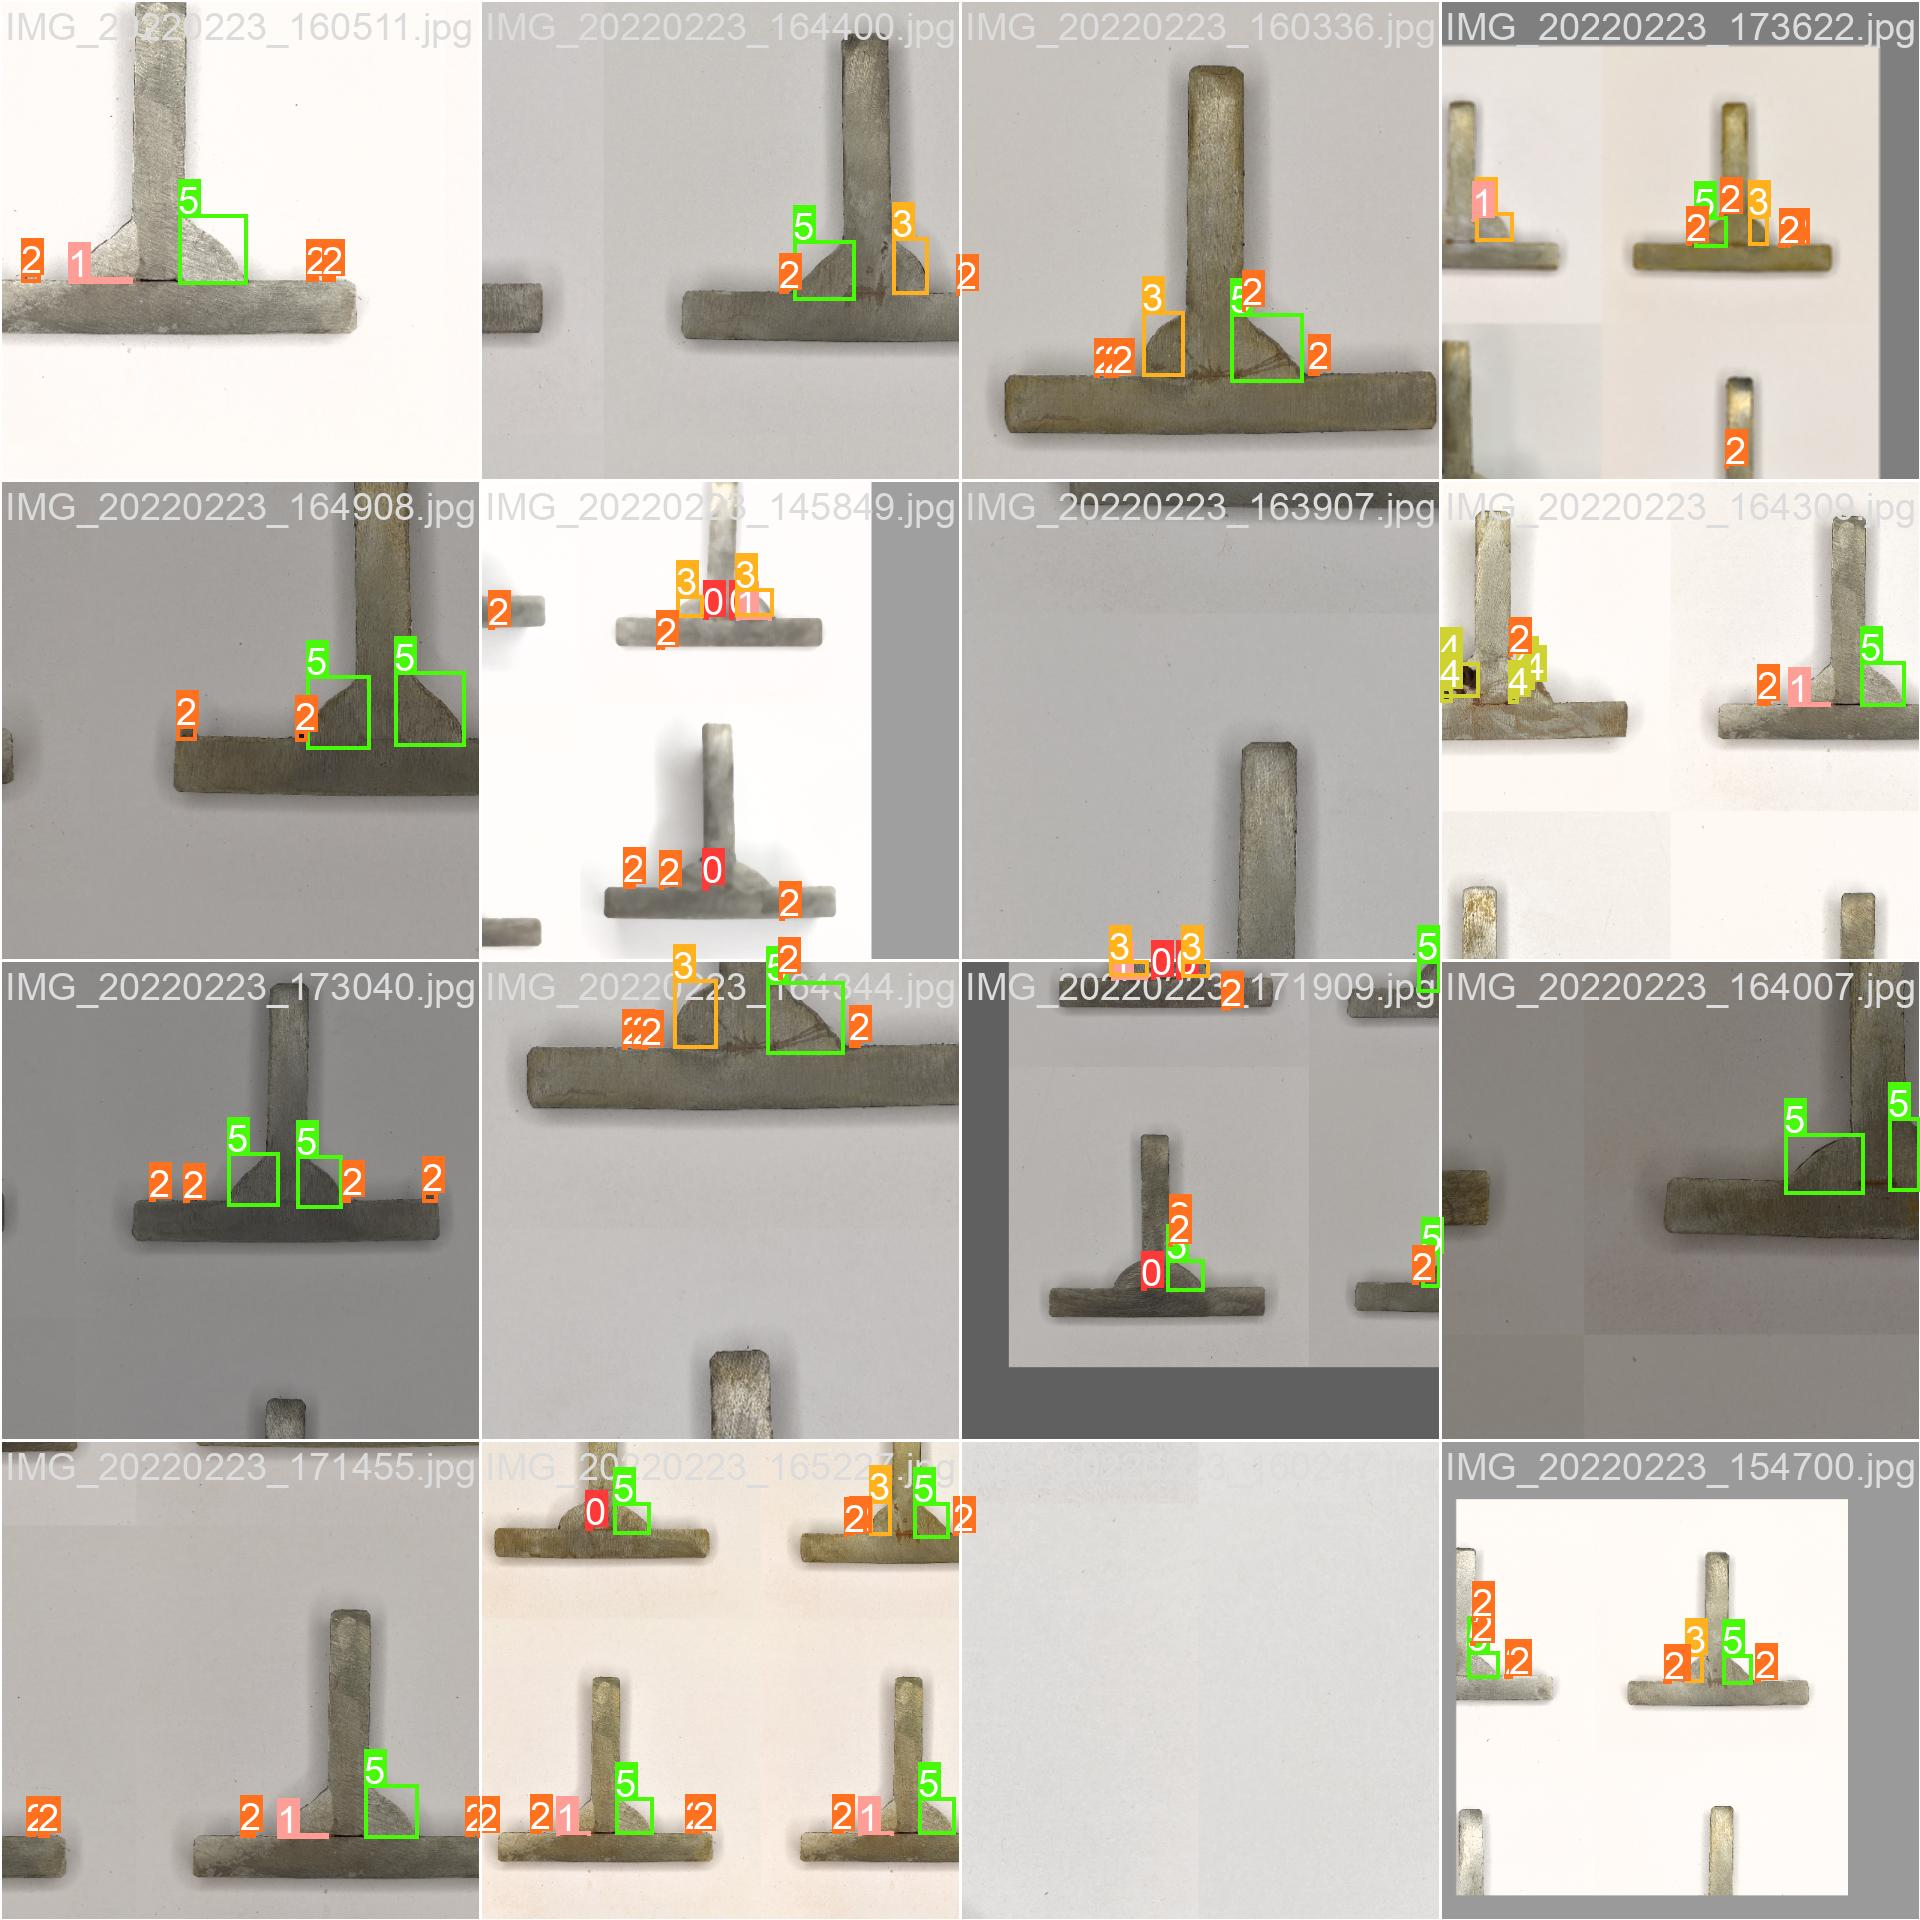

In [16]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/yolov10/yolov10/runs/detect/train2/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))

In [22]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/drive/MyDrive/yolov10/yolov10/runs/detect/train2/weights/best.pt source=/content/drive/MyDrive/yolov10/yolov10/dataset/test/images/IMG_20220223_153401.jpg

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [23]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/yolov10/yolov10/runs/detect/predict3/IMG_20220223_153401.jpg'):
      display(Image(filename=image_path, width=600))

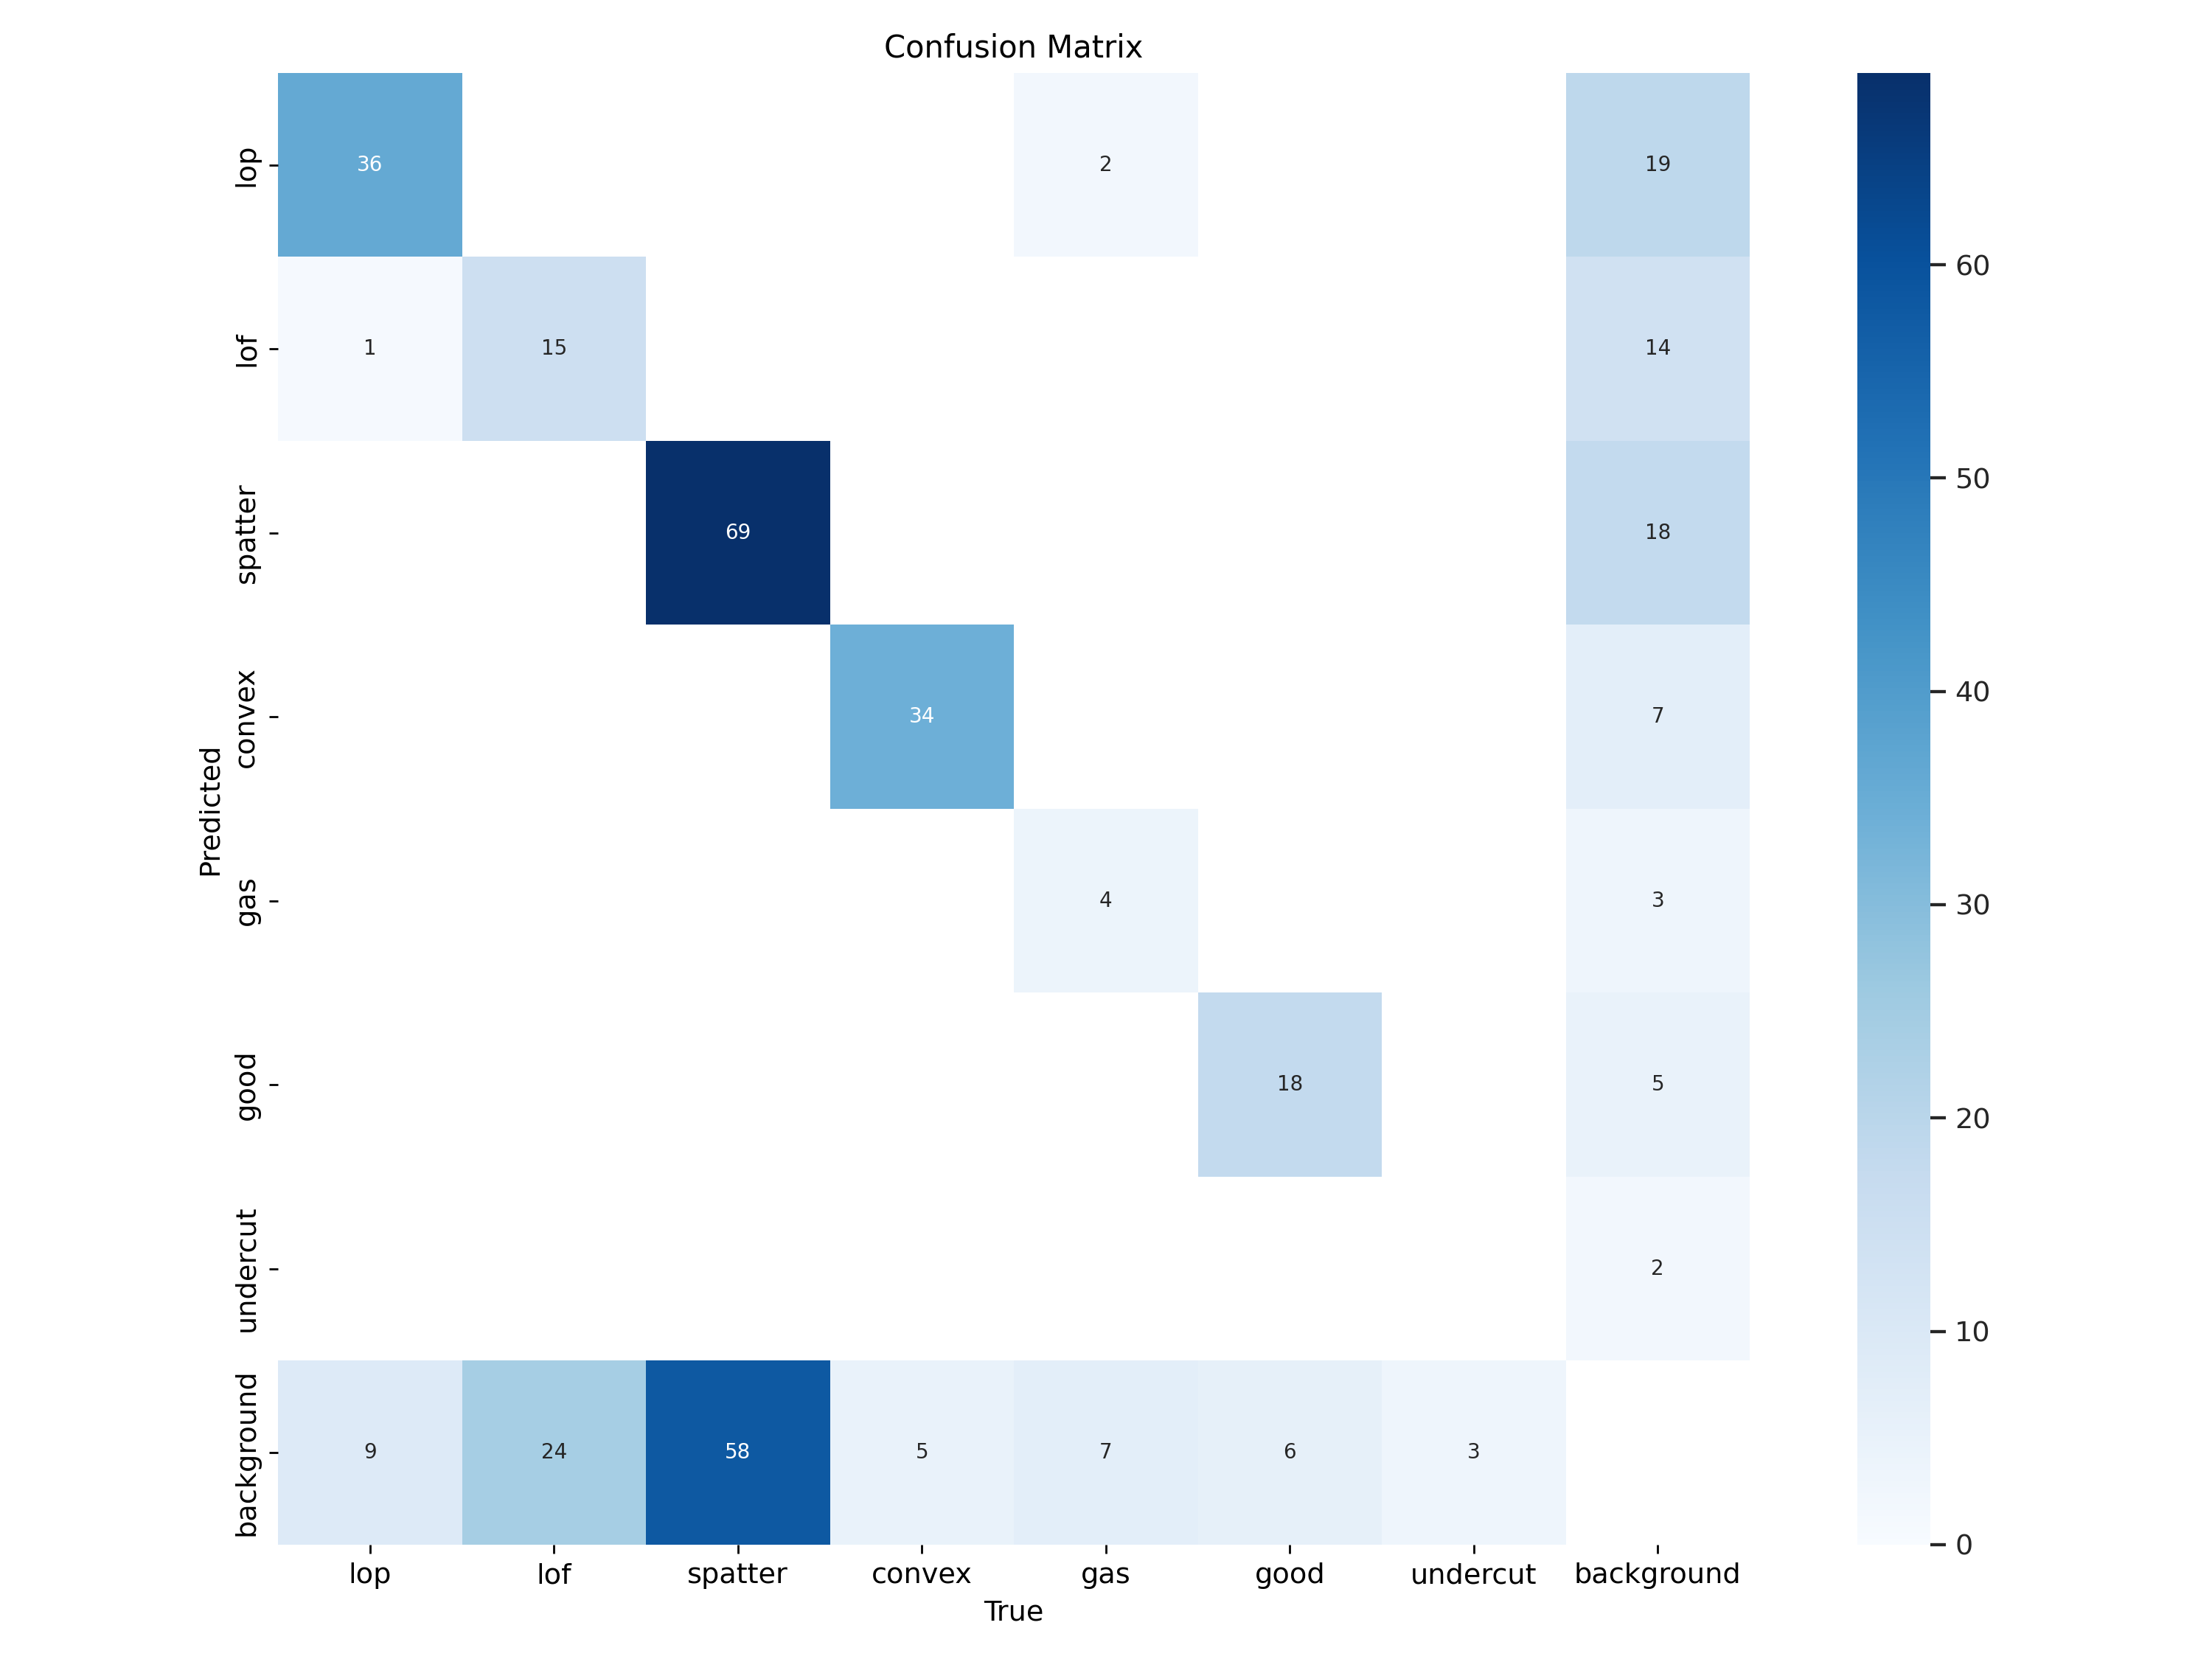

In [18]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/yolov10/yolov10/runs/detect/train2/confusion_matrix.png'):
      display(Image(filename=image_path, width=600))

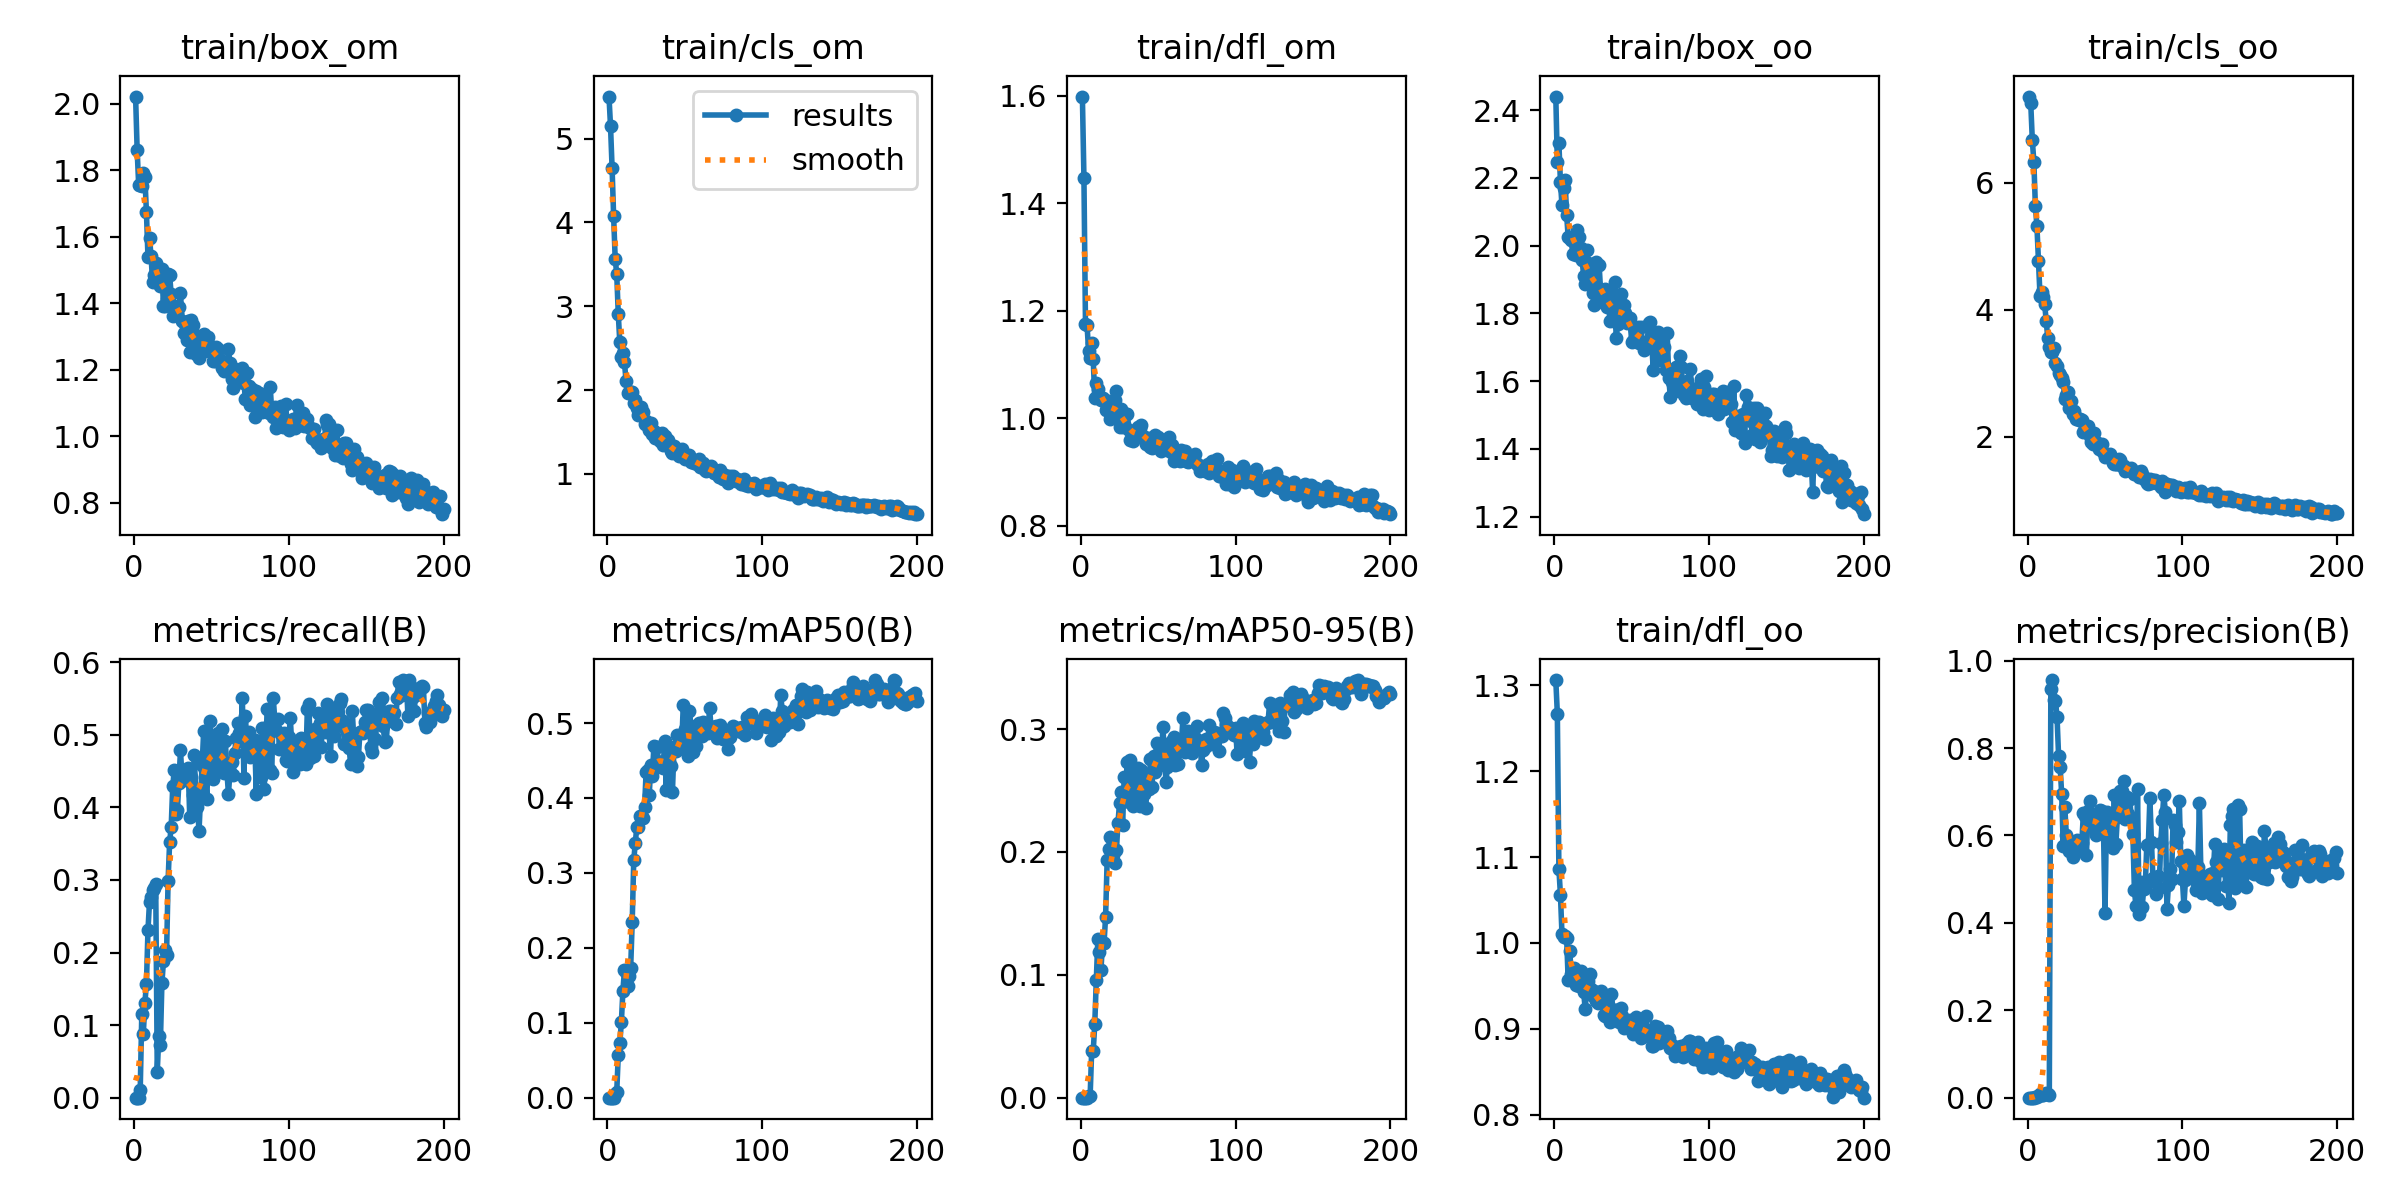

In [20]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/yolov10/yolov10/runs/detect/train2/results.png'):
      display(Image(filename=image_path, width=600))

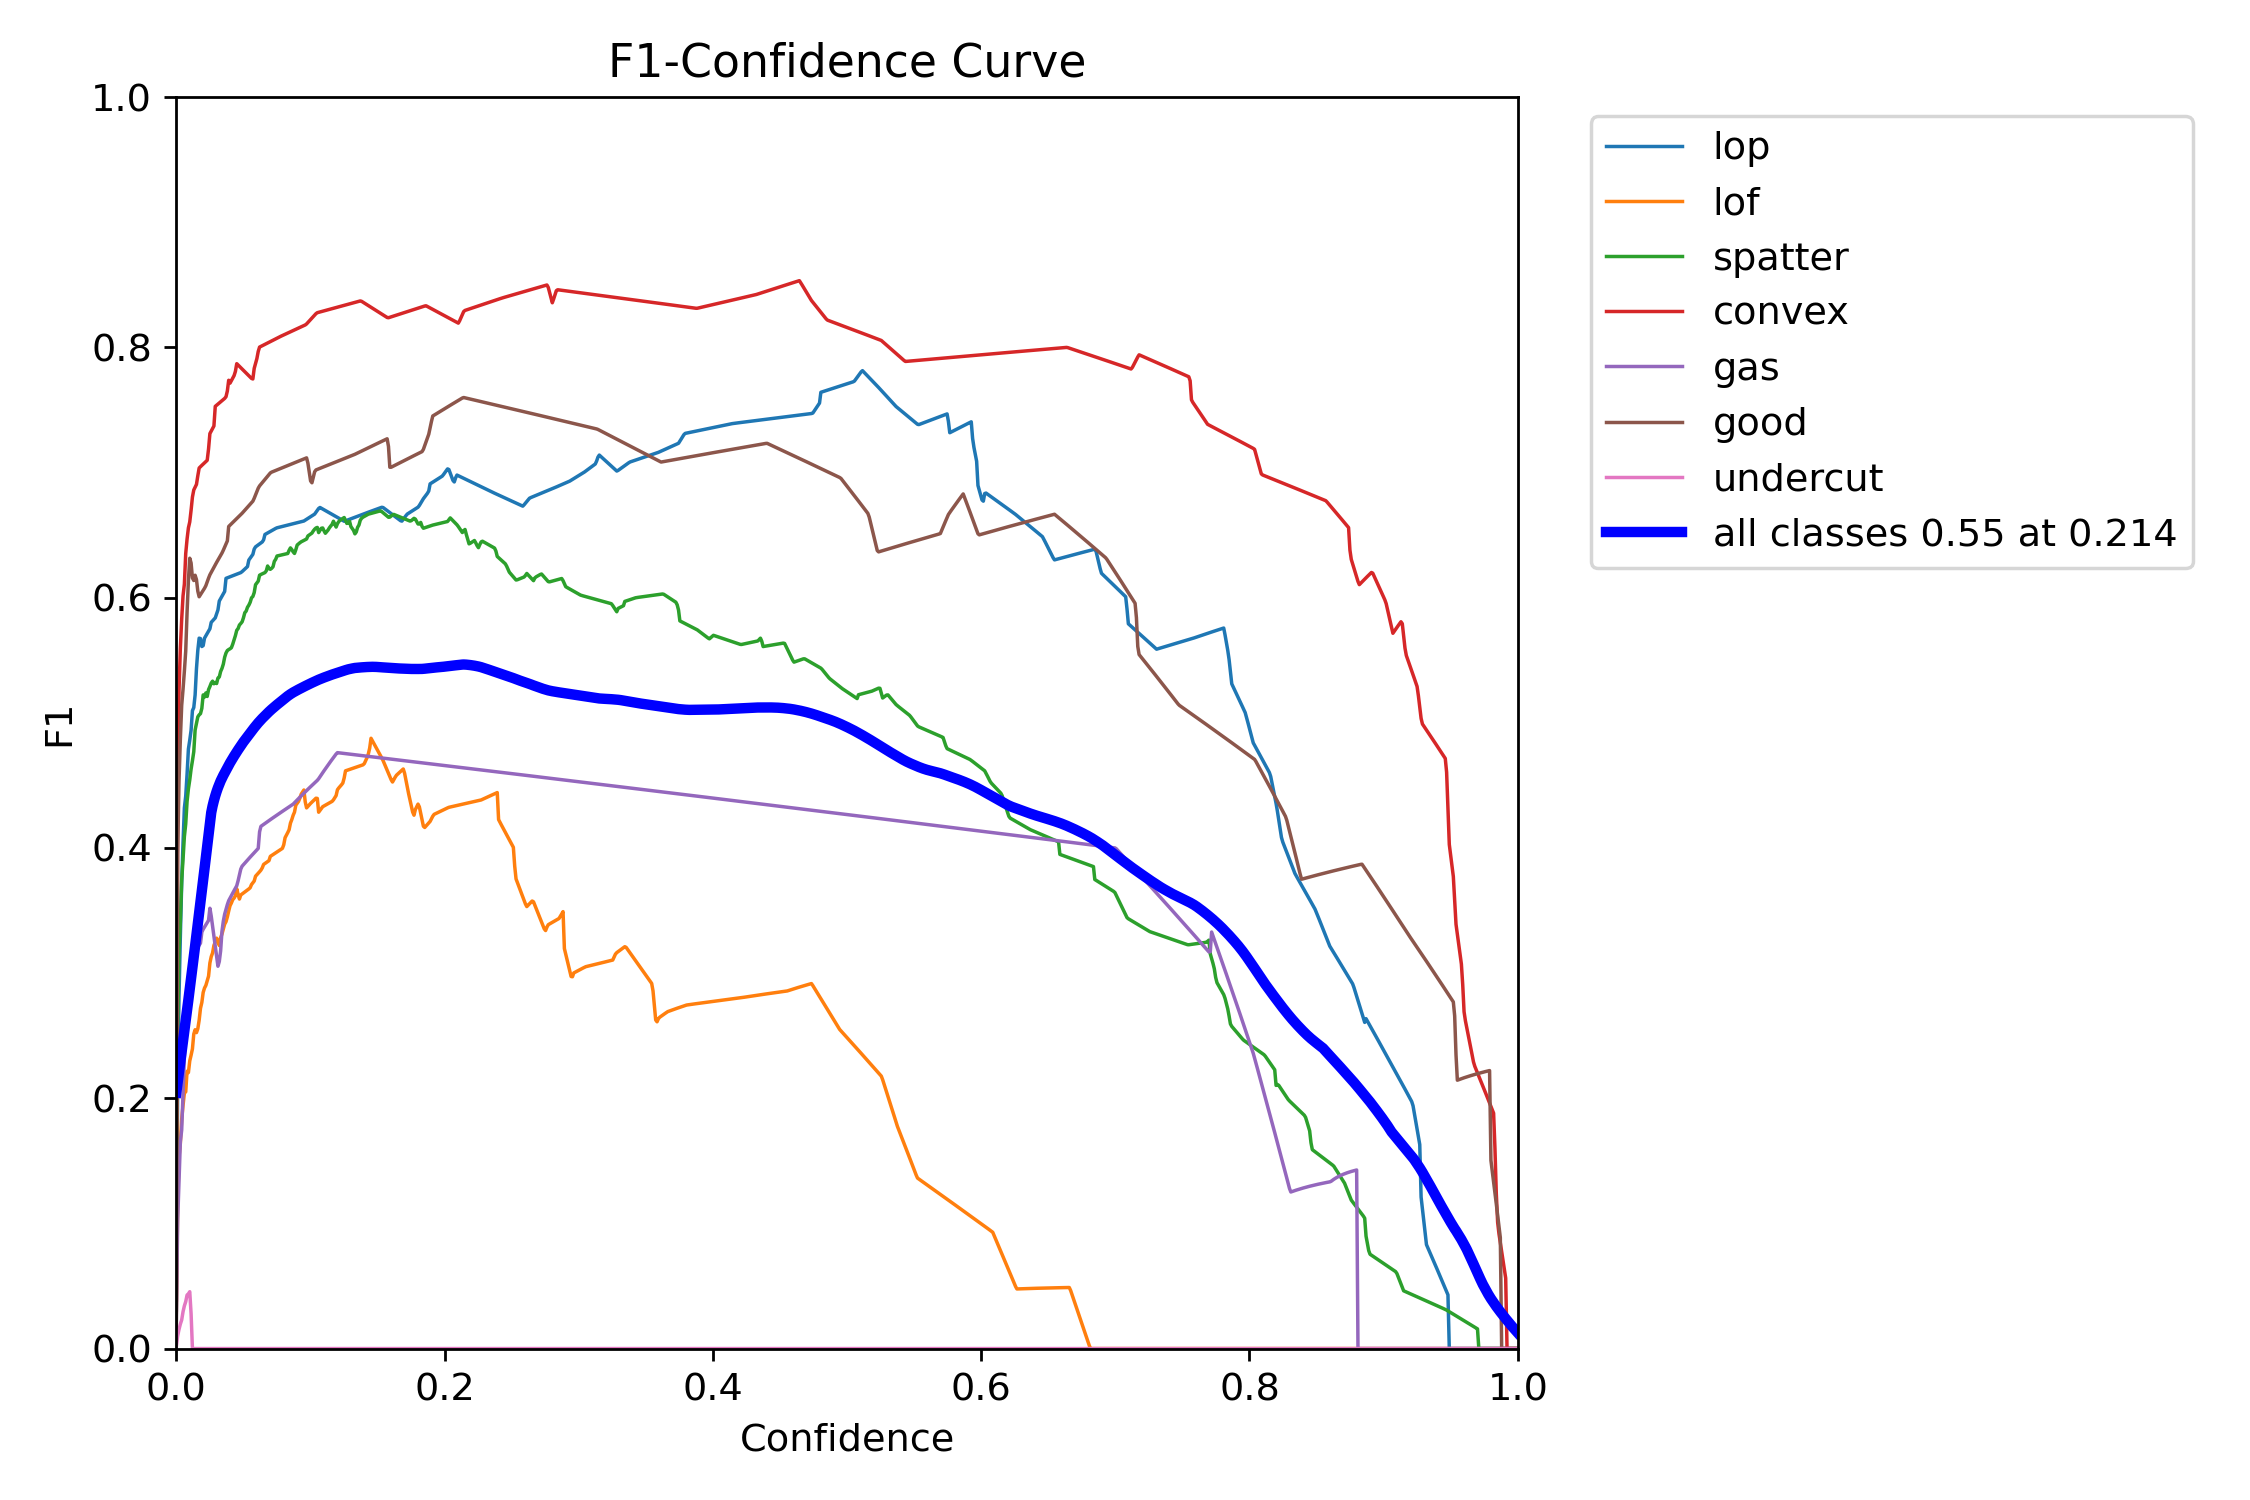

In [21]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/yolov10/yolov10/runs/detect/train2/F1_curve.png'):
      display(Image(filename=image_path, width=600))